<a href="https://colab.research.google.com/github/sedanurozer/ClassMetotDemo/blob/master/cifar10_84_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization, DepthwiseConv2D

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
# setting class names
class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
#loading the dataset
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [4]:
x_train=x_train/255.0
x_train.shape

(50000, 32, 32, 3)

In [5]:
x_test=x_test/255.0
x_test.shape

(10000, 32, 32, 3)

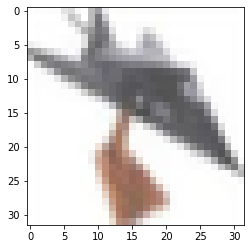

In [6]:
plt.imshow(x_test[215])

In [7]:
model_layers = [
    Conv2D(32, (3, 3), activation='relu', strides=(1,1), padding='same', input_shape=(32, 32, 3)),
    BatchNormalization(),
    DepthwiseConv2D(kernel_size=(3,3), strides=(1, 1), padding='same', activation='relu', depth_multiplier=3),
#     MaxPooling2D(2, 2),
    Dropout(rate =0.1),
    
    
    Conv2D(64, (3, 3), activation='relu', strides=(2, 2), padding='same'),
    BatchNormalization(),
    DepthwiseConv2D(kernel_size=(3,3), strides=(1, 1), padding='same', activation='relu'),
#     MaxPooling2D(2, 2),
    Dropout(rate = 0.1),
    
    Conv2D(128, (3, 3), activation='relu', strides=(1, 1), padding='same'),
    BatchNormalization(),
    DepthwiseConv2D(kernel_size=(3,3), strides=(1, 1), padding='same', activation='relu'),
#     MaxPooling2D(2, 2),
    Dropout(rate = 0.4),
    
    Conv2D(128, (3, 3), activation='relu', strides=(1, 1), padding='same'),
    BatchNormalization(),
    DepthwiseConv2D(kernel_size=(1,1), strides=(1, 1), padding='same', activation='relu'),
    
    
    Conv2D(256, (3, 3), activation='relu', strides=(2, 2), padding='same'),
    BatchNormalization(),
    DepthwiseConv2D(kernel_size=(3,3), strides=(1, 1), padding='same', activation='relu'),
    
    
    
    Conv2D(512, (1, 1), activation='relu', strides=(2, 2), padding='same'),
    BatchNormalization(),
    DepthwiseConv2D(kernel_size=(1,1), strides=(1, 1), padding='same', activation='relu'),
    
#     MaxPooling2D(2, 2),
    Dropout(rate = 0.4),
    
    Flatten(),
    Dropout(rate = 0.3),
    Dense(2048, activation='relu'),
    Dropout(rate = 0.3),
    Dense(512, activation='relu'),
    Dropout(rate = 0.4),
    Dense(10, activation='softmax')
] 
model = Sequential(model_layers)

In [8]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["sparse_categorical_accuracy"])

In [20]:
model_train= model.fit(x_train,y_train,epochs=20)

Epoch 1/20
1563/1563 [==============================] - 25s 16ms/step - loss: 0.3640 - sparse_categorical_accuracy: 0.8755
Epoch 2/20
1563/1563 [==============================] - 25s 16ms/step - loss: 0.3622 - sparse_categorical_accuracy: 0.8748
Epoch 3/20
1563/1563 [==============================] - 25s 16ms/step - loss: 0.3536 - sparse_categorical_accuracy: 0.8791
Epoch 4/20
1563/1563 [==============================] - 25s 16ms/step - loss: 0.3474 - sparse_categorical_accuracy: 0.8823
Epoch 5/20
1563/1563 [==============================] - 25s 16ms/step - loss: 0.3344 - sparse_categorical_accuracy: 0.8853
Epoch 6/20
1563/1563 [==============================] - 25s 16ms/step - loss: 0.3315 - sparse_categorical_accuracy: 0.8859
Epoch 7/20
1563/1563 [==============================] - 25s 16ms/step - loss: 0.3232 - sparse_categorical_accuracy: 0.8871
Epoch 8/20
1563/1563 [==============================] - 25s 16ms/step - loss: 0.3144 - sparse_categorical_accuracy: 0.8913
Epoch 9/20
1563/

In [21]:
test_eval = model.evaluate(x_test, y_test, verbose=0)

In [29]:
print('Test loss:', test_eval[0])
print('Test accuracy: %',test_eval[1]*100)

Test loss: 0.4588712751865387
Test accuracy: % 85.55999994277954


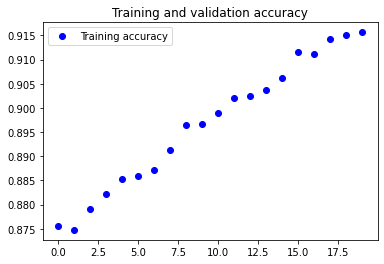

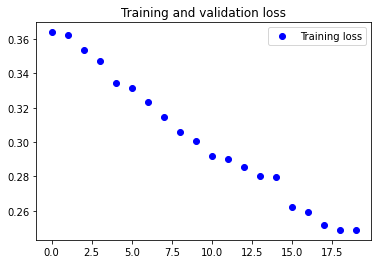

In [27]:
accuracy = model_train.history['sparse_categorical_accuracy']
#val_accuracy = model_train.history['sparse_categorical_accuracy']
loss = model_train.history['loss']
#val_loss = model_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
#plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
#plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()